<a href="https://colab.research.google.com/github/changsin/Medium/blob/main/yolo_as_language_teacher/language_teacher_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO for Language Acquisition

## Why do you need to learn a foreign language in the age of AI?
Language acquisition is a great challenge. It takes a long time to acquire a foreign language. Though there are many free language tutorials and Apps that make it easier, learning a language is still hard.


If you kept abreast with the latest development in AI, you might question the need to learn a foreign language because machine translation has progressed so much that its usage is widely adopted into every professional human translators. I can personally testify as a polyglot and NLP practitioner the qualitative difference I see in machine translation services like Google Translate.

The question is valid but speaking a foreign language yourself is different from translation whether it is done by a human or machine. There is a conceptual and cultural barrier that no amount of translation can bridge it for you. Acquiring a language equips you with not only a new tongue but a brand new pair of ears and eyes to see a world that did not exist for you.

The good news is that AI is not just for translation. I found that you can actually use it as a way to learning a new language. Recently, I have been trying to pick up Vietnamese and I turned AI as my aid.

## YOLO as flash cards?
One of the traditional language acquisition methods that people us is using flash cards. For instance, when I first learned English, I wrote Korean words on one side and the English equivalents on the other. I carried them on my pocket and flipped them through whenever I had time. In the 21st century, I think we can do better.

Instead of paper flash cards, it would be nice if I could see the object the word refers to. Ah ha! That sounds like object detection, doesn't it?

[YOLO v5](https://github.com/ultralytics/yolov5) is one of the most widely used object detection model and this is what I will be using to demonstrate how it can be a great language teacher.

The idea is simple. Instead of showing English labels for objects, I want YOLO to display labels in the target foreign language I want to learn. In my case, it will be Vietnamese.

## Train or cheat?
One hard way to achieve my purpose is to train YOLO in the target language but with foreign language labels. That would serve the purpose in some cases. For my purposes, however, I found that option to be too difficult and time consuming.

An easier way is to just replace the labels from English to the target language and that is what I want to show below.


# Setup
First install pre-requisites. We need to use earlier versions of youtube-dl and Pillow to avoid version-incompatibility issues.


In [1]:
!pip install youtube-dl==2020.12.2
!pip install pafy

!pip install Pillow==9.0.0
# !pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


First clone yolov5. You can clone from my forked version of yolov5 which has the modification for language translation.


In [ ]:
!git clone https://github.com/changsin/Medium/

Cloning into 'Medium'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 87 (delta 38), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [2]:
# use my cloned copy of yolov5 which has the language translation feature.
# !git clone https://github.com/changsin/yolov5
# !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


# YOLOv5 Modified
I have made just two changes to yolov5 repo.

1. Translated names in the config file: data/coco128-vi.yaml is an exact copy of data/coco128.yaml except the list of names are translated from English to Vietnamese (using Google translate).
```yaml
# Classes
nc: 80  # number of classes
names: ['người', 'Xe đạp', 'xe ô tô', 'xe máy', 'Máy bay', 'xe buýt', 'tàu hỏa', 'xe tải', 'thuyền', 'đèn giao thông',
        'vòi chữa cháy', 'biển báo dừng', 'Đồng hồ đỗ xe', 'Băng ghế', 'chim', 'con mèo', 'chú chó', 'con ngựa', 'con cừu', 'bò',
        'con voi', 'con gấu', 'ngựa rằn', 'hươu cao cổ', 'balo', 'ô', 'túi xách tay', 'cà vạt', 'chiếc vali', 'chiếc dĩa nhựa ném',
        'ván trượt', 'trượt tuyết', 'bóng thể thao', 'cánh diều', 'gậy bóng chày', 'găng tay bóng chày', 'ván trượt', 'ván lướt sóng',
        'vợt tennis', 'chai', 'ly rượu', 'tách', 'cái nĩa', 'dao', 'cái thìa', 'bát', 'trái chuối', 'táo',
        'bánh mì sandwich', 'trái cam', 'bông cải xanh', 'Cà rốt', 'bánh mì kẹp xúc xích', 'pizza', 'bánh vòng', 'bánh', 'cái ghế', 'đi văng',
        'cây chậu', 'Giường', 'bàn ăn', 'phòng vệ sinh', 'TV', 'máy tính xách tay', 'con chuột', 'Xa xôi', 'bàn phím', 'điện thoại di động',
        'lò vi sóng', 'lò', 'Máy nướng bánh mì', 'bồn rửa chén', 'tủ lạnh', 'sách', 'đồng hồ', 'lọ cắm hoa', 'cây kéo', 'gấu bông',
        'máy sấy tóc', 'Bàn chải đánh răng']  # class names
```

2. In detect.py, load the translated yaml file and replace the variable 'names' with the translated names. Make sure that the encoding is utf-8 to display unicode characters correctly.
```python
import yaml

    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # replace names with the translated names
    filename_coco128_vi = 'data/coco128-vi.yaml'
    # Ensure that the encoding is utf-8
    with open(filename_coco128_vi, errors='ignore', encoding="utf-8") as f:
        names = yaml.safe_load(f)['names']  # class names
        print(names)
```

Note that this is certainly a hack and I am not promoting it as a great programming practice. It is just a trick that I found useful to achieve my goal.

A little bit of explanation is needed why I replaced the names here.
A more logical way is to pass the translated names as 'data' parameter to DetectMultiBackend.

The data parameter is the path of the yaml file from which names are loaded. This was done in models/common.py:
```python
        if data:  # data.yaml path (optional)
            with open(data, errors='ignore') as f:
                names = yaml.safe_load(f)['names']  # class names
```

So technically, you can just pass the name of the yaml file to use the new names to appear as annotations in the results.

If you tried using the pretrained pytorch model which is method, however, you will find that it does not work. Because the values are overriden right after.
```python
        if pt:  # PyTorch
            model = attempt_load(weights if isinstance(weights, list) else w, map_location=device)
            stride = max(int(model.stride.max()), 32)  # model stride
            names = model.module.names if hasattr(model, 'module') else model.names  # get class names
            model.half() if fp16 else model.float()
            self.model = model  # explicitly assign for to(), cpu(), cuda(), half()

```

What the code does is that it loads the names from the pre-trained model and thus whatever you specified before, they will be replaced with what the pre-trained model trained on in the first place.

Having the code changes ready, you can now follow the rest of the examples and use YOLO as your Vietnamese language teacher. Enjoy!

# Upload and detect
Use the YOLOV5 to detect objects and display in the target language. Upload a picture now.


In [ ]:
!pwd

/content/yolov5


In [ ]:
import cv2

from google.colab import files
from io import BytesIO
from PIL import Image
# from pathlib import Path

from google.colab.patches import cv2_imshow
# from IPython.display import clear_output


!rm -rf /content/yolov5/runs/detect
uploaded = files.upload()
uploaded_filename = list(uploaded.items())[0][0]
print(uploaded_filename)
# im = Image.open(BytesIO(image_bytes))
!python detect.py --weights yolov5s.pt --img 640 --conf 0.5 --source $uploaded_filename --data ../Medium/yolo_as_language_teacher/coco128-vi.yaml
pred_image = cv2.imread('runs/detect/exp/' + uploaded_filename)
cv2_imshow(pred_image)

You can see that objects are displayed with Vietnamese labels. No flash cards are needed.

# Real-time inferencing
Uploading a picture one at a time works, but it will be really good if we can see it happening in real time. YOLOv5 can be made into a servie, of course, and you can use your mobile phone to learn in real time. 
An alternative is to use a live stream. There are many youtube live streams and with a little bit of work, you can experience life in Vietnam and learn the language. Enjoy!

In [3]:
import yaml

from yolov5.models.common import DetectMultiBackend, AutoShape

model_yolov5 = DetectMultiBackend(weights='yolov5s.pt', data='data/coco128-vi.yaml')
# model_yolov5 = DetectMultiBackend(weights='yolov5s.pt')
model_yolov5 = AutoShape(model_yolov5)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


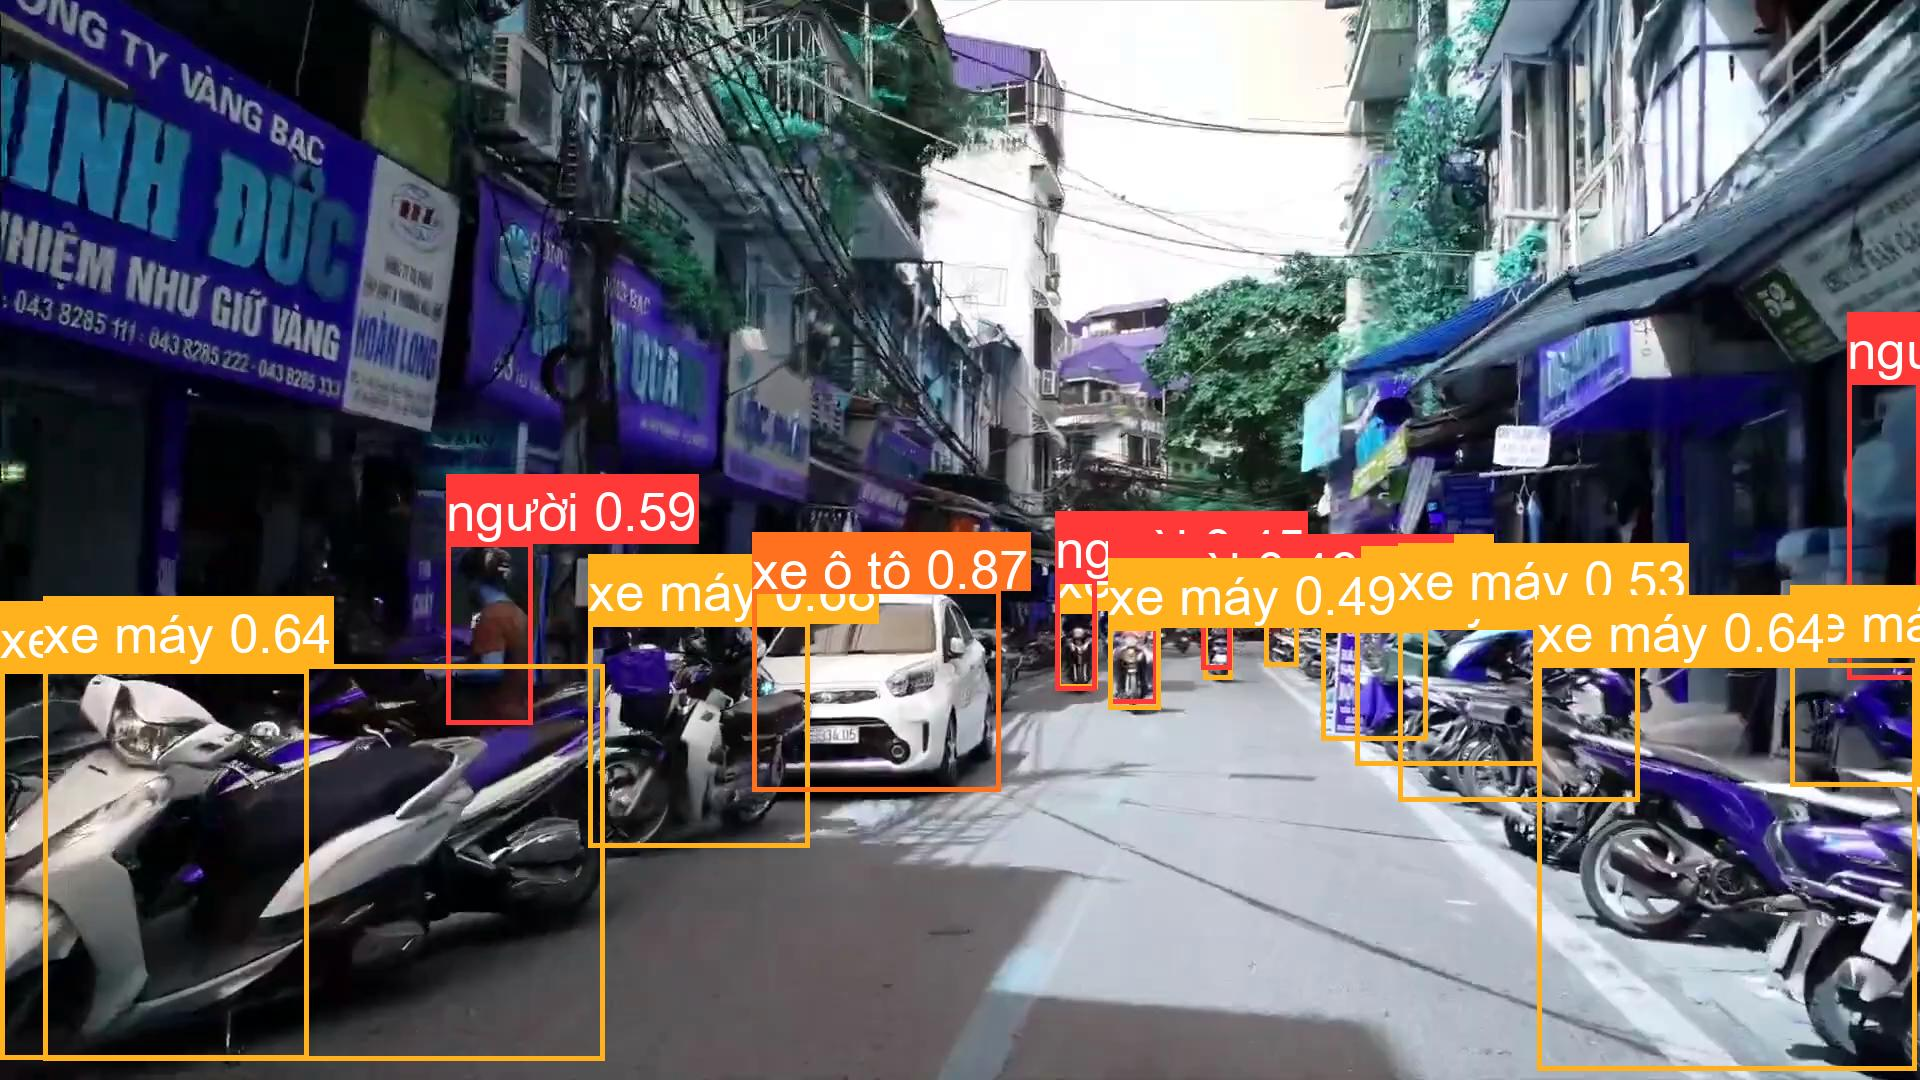

KeyboardInterrupt: ignored

In [6]:
import pafy
import cv2
import time
from pathlib import Path

from google.colab.patches import cv2_imshow
from IPython.display import clear_output

# TODO: replace with your own youtube live feed link
# Live Vietnam Walk Online Tour | Walking Beautiful Vietnam Hanoi Street 베트남 하노이 | ベトナムライブ Viêt Nam
url = "https://www.youtube.com/watch?v=r056BIXkyic"


video = pafy.new(url)
best = video.getbest(preftype="mp4")
# model_yolov5 = yolov5.load('yolov5s.pt')

while True:
    # cleanup 
    !rm -rf /content/yolov5/runs/detect
    capture = cv2.VideoCapture(best.url)
    grabbed, frame = capture.read()

    pred = model_yolov5(frame)
    # print(pred.names)
    pred.save("pred")

    clear_output(wait=True)
    # load the saved image and display it
    pred_image = cv2.imread("runs/detect/exp/image0.jpg")
    cv2_imshow(pred_image)

    time.sleep(5)

# Appendix

Here is a brief explanation of YOLO prediction results.

## Explanation of detection results

1. results.names contain the names of classes: e.g., 'person'. There are 80 of them by default corresponding to 80 COCO dataset classes.

  ['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']
 

2. results.xyxyn: xy coordinates followed by the confidence and the class id. For instance, the first item is class_id=0 with 90% confidence which refers to 'person' class

```
[tensor([[ 0.73203,  0.43620,  0.85469,  0.88646,  0.90088,  0.00000],
         [ 0.70586,  0.36276,  0.92344,  0.49609,  0.62939, 25.00000],
         [ 0.58125,  0.40365,  0.73984,  0.78594,  0.46143, 77.00000],
         [ 0.39355,  0.15990,  0.58789,  0.80365,  0.44385, 10.00000],
         [ 0.19248,  0.50104,  0.20469,  0.54062,  0.29517,  0.00000]], device='cuda:0')]
```
results.xyxy and results.pred have the same content except in scientific notations.
```
[tensor([[1.75687e+03, 7.85156e+02, 2.05125e+03, 1.59562e+03, 9.00879e-01, 0.00000e+00],
         [1.69406e+03, 6.52969e+02, 2.21625e+03, 8.92969e+02, 6.29395e-01, 2.50000e+01],
         [1.39500e+03, 7.26562e+02, 1.77562e+03, 1.41469e+03, 4.61426e-01, 7.70000e+01],
         [9.44531e+02, 2.87812e+02, 1.41094e+03, 1.44656e+03, 4.43848e-01, 1.00000e+01],
         [4.61953e+02, 9.01875e+02, 4.91250e+02, 9.73125e+02, 2.95166e-01, 0.00000e+00]], device='cuda:0')]
```
3. results.imgs is the labeled image containing the detection results.
4. results.save('folder') saves the detection result image to the folder.


With this information, we can now parse and count each vehicle type.

## Plot annotations

Make a dictionary out of English and Vietnamese class names

In [ ]:
coco_classes_en_vi = dict(zip(pred.names, coco_vn['names']))

In [ ]:
for k, v in coco_classes_en_vi.items():
  print("{}: {}".format(k, v))

person: người
bicycle: Xe đạp
car: xe ô tô
motorcycle: xe máy
airplane: Máy bay
bus: xe buýt
train: tàu hỏa
truck: xe tải
boat: thuyền
traffic light: đèn giao thông
fire hydrant: vòi chữa cháy
stop sign: biển báo dừng
parking meter: Đồng hồ đỗ xe
bench: Băng ghế
bird: chim
cat: con mèo
dog: chú chó
horse: con ngựa
sheep: con cừu
cow: bò
elephant: con voi
bear: con gấu
zebra: ngựa rằn
giraffe: hươu cao cổ
backpack: balo
umbrella: ô
handbag: túi xách tay
tie: cà vạt
suitcase: chiếc vali
frisbee: chiếc dĩa nhựa ném
skis: ván trượt
snowboard: trượt tuyết
sports ball: bóng thể thao
kite: cánh diều
baseball bat: gậy bóng chày
baseball glove: găng tay bóng chày
skateboard: ván trượt
surfboard: ván lướt sóng
tennis racket: vợt tennis
bottle: chai
wine glass: ly rượu
cup: tách
fork: cái nĩa
knife: dao
spoon: cái thìa
bowl: bát
banana: trái chuối
apple: táo
sandwich: bánh mì sandwich
orange: trái cam
broccoli: bông cải xanh
carrot: Cà rốt
hot dog: bánh mì kẹp xúc xích
pizza: pizza
donut: bánh vò